In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [26]:
df_bankruptcy=pd.read_csv('../data/accouting_data/bankruptcy_accouting_stalt.csv')
df_healthy=pd.read_csv('../data/accouting_data/healthy_accouting_stalt.csv')
df_healthy=df_healthy[df_healthy['costat']=='A']

In [27]:
df_healthy.columns

Index(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'curcd', 'stalt', 'act', 'amgw', 'at', 'capx', 'ceqt', 'ch',
       'csho', 'cshpri', 'dt', 'dvp', 'dvt', 'ebit', 'emp', 'epsfi', 'fincf',
       'gdwl', 'gp', 'intan', 'ivncf', 'lct', 'lt', 'ni', 'oancf', 'oibdp',
       'pll', 'pvcl', 'revt', 'teq', 'tie', 'txtubtxtr', 'udvp', 'unwcc',
       'ustdnc', 'wcap', 'wdp', 'costat', 'fic', 'prcc_f', 'au', 'dlrsn',
       'incorp', 'spcseccd'],
      dtype='object')

In [16]:
df_temp=df_healthy[(df_healthy['fyear']==2019) | (df_healthy['fyear']==2018) |(df_healthy['fyear']==2017)] #&  df_healthy['prcc_f'].notnull()]

In [17]:
df_temp1=df_healthy['gvkey'][df_healthy['fyear']==2019].unique()
df_temp2=df_healthy['gvkey'][df_healthy['fyear']==2018].unique()
df_temp3=df_healthy['gvkey'][df_healthy['fyear']==2017].unique()

In [18]:
id1=np.in1d(df_temp1,df_temp2,assume_unique=True)
id2=np.in1d(id1,df_temp3,assume_unique=True)

In [19]:
len(id2)

9906

In [20]:
bankruptcy_code=df_bankruptcy['gvkey'].unique()

In [21]:
all_company_code=df_bankruptcy['gvkey'].append(df_healthy['gvkey']).unique()

In [22]:
# company that has bankruptcy
len(bankruptcy_code)

953

In [23]:
#Total company number
len(all_company_code)

13336

In [24]:
#Accuracy
1-len(bankruptcy_code)/len(all_company_code)

0.9285392921415717

### Question 1: How many healthy companies should I included in this model?
### Question 2: How to draw the ROC curve for this plain model?

## Draw ROC Curve

In [55]:
y_score=np.ones(len(all_company_code))
for i in range(len(y_score)):
    if np.random.rand()>0.9724343399282657:
        y_score[i]=0
y_true=np.ones(len(all_company_code))
for i in range(len(y_true)):
    if all_company_code[i] in bankruptcy_code:
        y_true[i]=0

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1)

Text(0, 0.5, 'tpr')

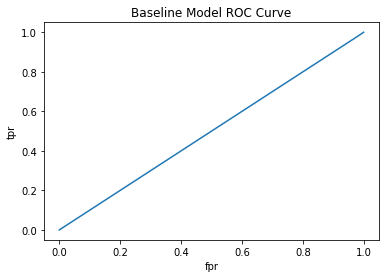

In [57]:
plt.plot(fpr,tpr)
plt.title('Baseline Model ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [58]:
roc_auc_score(y_true, y_score)

0.4996188384329091

### Note: The baseline model's accuracy is high, but should I really include so much true data? The auc curve cannot be draw. So how to evaluate it?